In [11]:
from scipy.signal import butter, filtfilt
import numpy as np

def lowpass_filter(signal, fs, cutoff=2000, order=4):
    """
    Aplica um filtro passa-baixa Butterworth de 4ª ordem.

    Parâmetros:
        signal (array-like): Sinal de entrada (1D)
        fs (float): Frequência de amostragem (Hz)
        cutoff (float): Frequência de corte do filtro (Hz)
        order (int): Ordem do filtro (padrão: 4)

    Retorna:
        signal_filtrado (np.ndarray): Sinal filtrado
    """
    # Normalizar a frequência de corte (Nyquist = fs / 2)
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq

    # Coeficientes do filtro
    b, a = butter(order, normal_cutoff, btype='low', analog=False)

    # Aplicar filtro com zero-phase (evita atraso de fase)
    filtered_signal = filtfilt(b, a, signal)

    return filtered_signal


In [14]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

def pre_process(sinal):
    # Exemplo de sinal (substitua pelo seu)
    fs = 40000  # frequência de amostragem em Hz
    sinal = np.array(sinal)

    # 1. RMS
    rms = np.sqrt(np.mean(sinal**2))

    # 2. Peak-to-Peak
    peak_to_peak = np.ptp(sinal)  # equivalente a: np.max(sinal) - np.min(sinal)

    # 3. Standard Deviation
    std = np.std(sinal)

    # Exibir os resultados
    print(f"RMS: {rms:.4f}")
    print(f"Peak-to-Peak: {peak_to_peak:.4f}")
    print(f"Standard Deviation: {std:.4f}")

    return rms, peak_to_peak, std


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alinaderi1/wind-turbine-gearbox-cm-vibration")

print("Path to dataset files:", path)

/home/amanda/Desktop/XP Educacao/ProjetoFinal/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/amanda/.cache/kagglehub/datasets/alinaderi1/wind-turbine-gearbox-cm-vibration/versions/1


In [2]:
import os

for root, dirs, files in os.walk(path):
    for name in files:
        print("File:", os.path.join(root, name))

File: /home/amanda/.cache/kagglehub/datasets/alinaderi1/wind-turbine-gearbox-cm-vibration/versions/1/Healthy_data.csv
File: /home/amanda/.cache/kagglehub/datasets/alinaderi1/wind-turbine-gearbox-cm-vibration/versions/1/Vibration Condition Monitoring Benchmarking Datasets.pdf
File: /home/amanda/.cache/kagglehub/datasets/alinaderi1/wind-turbine-gearbox-cm-vibration/versions/1/Damaged_data.csv


In [3]:
import pandas as pd

df_healthy_data = pd.read_csv(os.path.join(path, "Healthy_data.csv"))
df_damaged_data = pd.read_csv(os.path.join(path, "Damaged_data.csv"))

In [4]:
df_healthy_data = df_healthy_data.dropna()
df_damaged_data = df_damaged_data.dropna()

### Verificando se as condições de vibração NORMAL são constantes ao longo do tempo


In [22]:
all_sensors_healthy_acquisitions = []

for sensor in range(8):
    sensor+=3
    healthy_acquisitions = []
    for minute in range(9):
        vector = []
        vector = df_healthy_data[f'H{minute+1}_AN{sensor}']
        healthy_acquisitions.append(vector)
    all_sensors_healthy_acquisitions.append(healthy_acquisitions)

H1_AN3
RMS: 0.7923
Peak-to-Peak: 7.2021
Standard Deviation: 0.7923
H2_AN3
RMS: 0.7884
Peak-to-Peak: 6.8283
Standard Deviation: 0.7884
H3_AN3
RMS: 0.7886
Peak-to-Peak: 7.2089
Standard Deviation: 0.7886
H4_AN3
RMS: 0.7819
Peak-to-Peak: 6.8938
Standard Deviation: 0.7819
H5_AN3
RMS: 0.7847
Peak-to-Peak: 6.9388
Standard Deviation: 0.7847
H6_AN3
RMS: 0.7854
Peak-to-Peak: 6.9905
Standard Deviation: 0.7854
H7_AN3
RMS: 0.7882
Peak-to-Peak: 7.1458
Standard Deviation: 0.7882
H8_AN3
RMS: 0.7848
Peak-to-Peak: 6.7875
Standard Deviation: 0.7848
H9_AN3
RMS: 0.7843
Peak-to-Peak: 7.2711
Standard Deviation: 0.7843


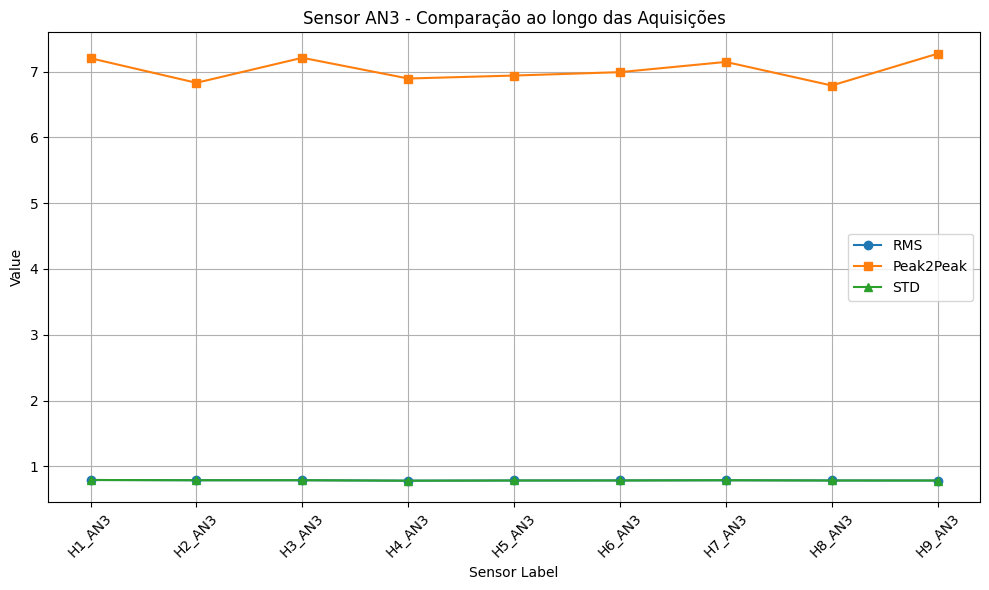

H1_AN3
RMS: 1.0471
Peak-to-Peak: 9.0972
Standard Deviation: 1.0471
H2_AN3
RMS: 1.0491
Peak-to-Peak: 9.3009
Standard Deviation: 1.0491
H3_AN3
RMS: 1.0506
Peak-to-Peak: 9.4260
Standard Deviation: 1.0506
H4_AN3
RMS: 1.0511
Peak-to-Peak: 9.1885
Standard Deviation: 1.0511
H5_AN3
RMS: 1.0514
Peak-to-Peak: 10.1672
Standard Deviation: 1.0514
H6_AN3
RMS: 1.0595
Peak-to-Peak: 9.6441
Standard Deviation: 1.0595
H7_AN3
RMS: 1.0640
Peak-to-Peak: 9.6412
Standard Deviation: 1.0640
H8_AN3
RMS: 1.0683
Peak-to-Peak: 9.4841
Standard Deviation: 1.0683
H9_AN3
RMS: 1.0660
Peak-to-Peak: 9.3431
Standard Deviation: 1.0660


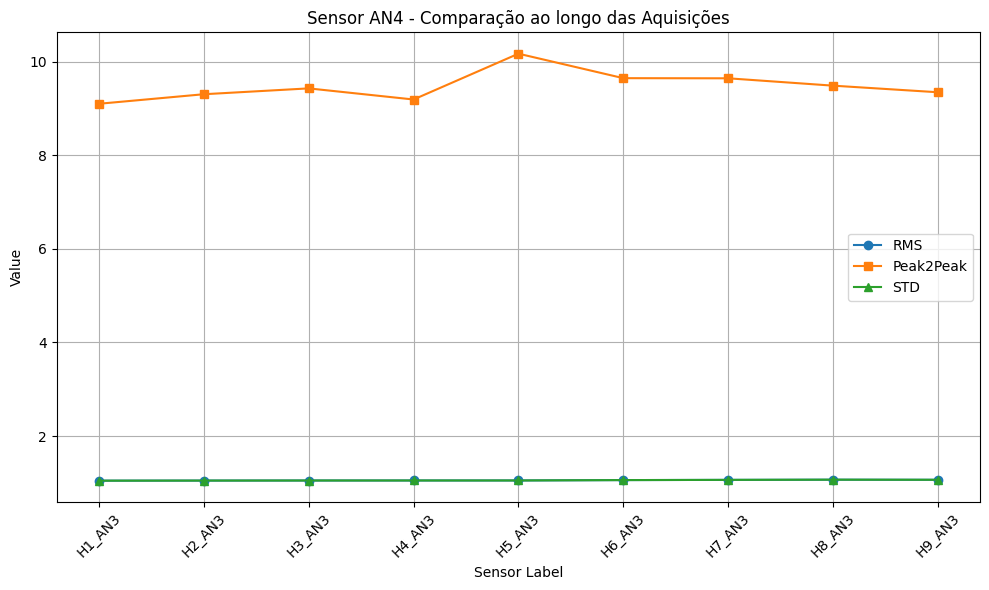

H1_AN3
RMS: 1.1220
Peak-to-Peak: 11.6563
Standard Deviation: 1.1183
H2_AN3
RMS: 1.1252
Peak-to-Peak: 11.1367
Standard Deviation: 1.1215
H3_AN3
RMS: 1.1250
Peak-to-Peak: 11.1584
Standard Deviation: 1.1212
H4_AN3
RMS: 1.1183
Peak-to-Peak: 10.9654
Standard Deviation: 1.1144
H5_AN3
RMS: 1.1221
Peak-to-Peak: 10.4475
Standard Deviation: 1.1182
H6_AN3
RMS: 1.1318
Peak-to-Peak: 11.3717
Standard Deviation: 1.1280
H7_AN3
RMS: 1.1359
Peak-to-Peak: 11.6666
Standard Deviation: 1.1321
H8_AN3
RMS: 1.1393
Peak-to-Peak: 11.0747
Standard Deviation: 1.1355
H9_AN3
RMS: 1.1433
Peak-to-Peak: 11.3423
Standard Deviation: 1.1395


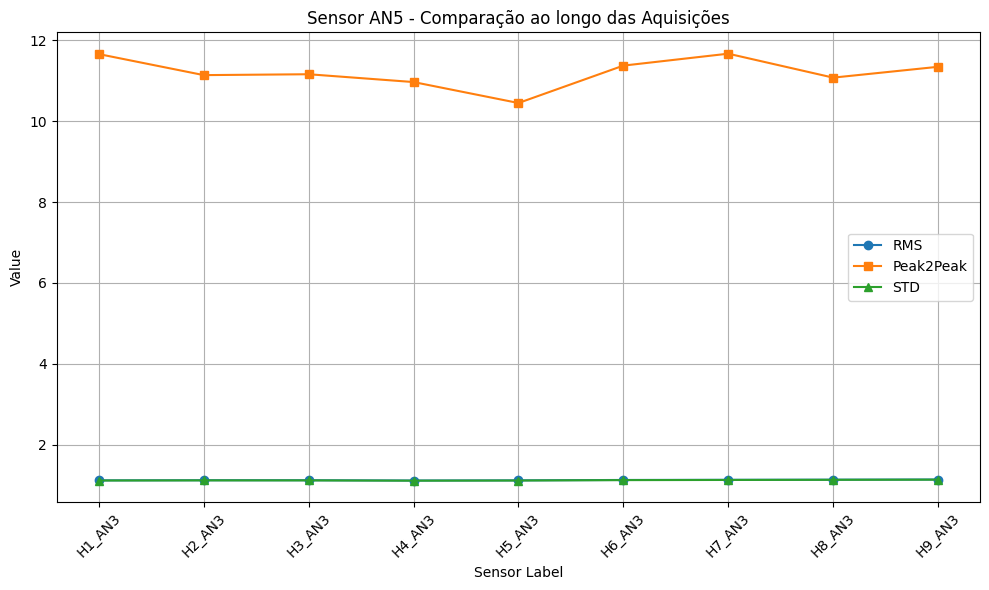

H1_AN3
RMS: 1.3315
Peak-to-Peak: 12.0538
Standard Deviation: 1.3101
H2_AN3
RMS: 1.3400
Peak-to-Peak: 11.8098
Standard Deviation: 1.3189
H3_AN3
RMS: 1.3487
Peak-to-Peak: 12.4103
Standard Deviation: 1.3277
H4_AN3
RMS: 1.3380
Peak-to-Peak: 12.5448
Standard Deviation: 1.3168
H5_AN3
RMS: 1.3374
Peak-to-Peak: 11.8058
Standard Deviation: 1.3160
H6_AN3
RMS: 1.3518
Peak-to-Peak: 12.4509
Standard Deviation: 1.3309
H7_AN3
RMS: 1.3636
Peak-to-Peak: 13.7813
Standard Deviation: 1.3428
H8_AN3
RMS: 1.3753
Peak-to-Peak: 13.0764
Standard Deviation: 1.3545
H9_AN3
RMS: 1.3670
Peak-to-Peak: 12.7843
Standard Deviation: 1.3463


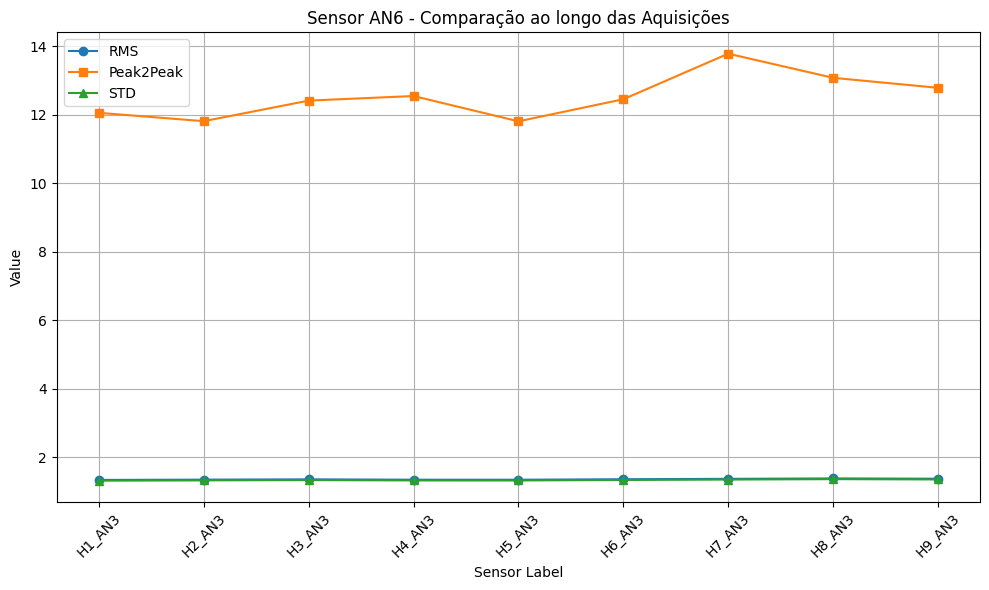

H1_AN3
RMS: 1.1943
Peak-to-Peak: 10.2541
Standard Deviation: 1.1941
H2_AN3
RMS: 1.2028
Peak-to-Peak: 10.9046
Standard Deviation: 1.2027
H3_AN3
RMS: 1.2150
Peak-to-Peak: 11.3786
Standard Deviation: 1.2149
H4_AN3
RMS: 1.2071
Peak-to-Peak: 10.8912
Standard Deviation: 1.2070
H5_AN3
RMS: 1.2134
Peak-to-Peak: 10.5866
Standard Deviation: 1.2133
H6_AN3
RMS: 1.2264
Peak-to-Peak: 11.3261
Standard Deviation: 1.2262
H7_AN3
RMS: 1.2408
Peak-to-Peak: 12.3638
Standard Deviation: 1.2407
H8_AN3
RMS: 1.2426
Peak-to-Peak: 11.9932
Standard Deviation: 1.2425
H9_AN3
RMS: 1.2403
Peak-to-Peak: 10.7887
Standard Deviation: 1.2401


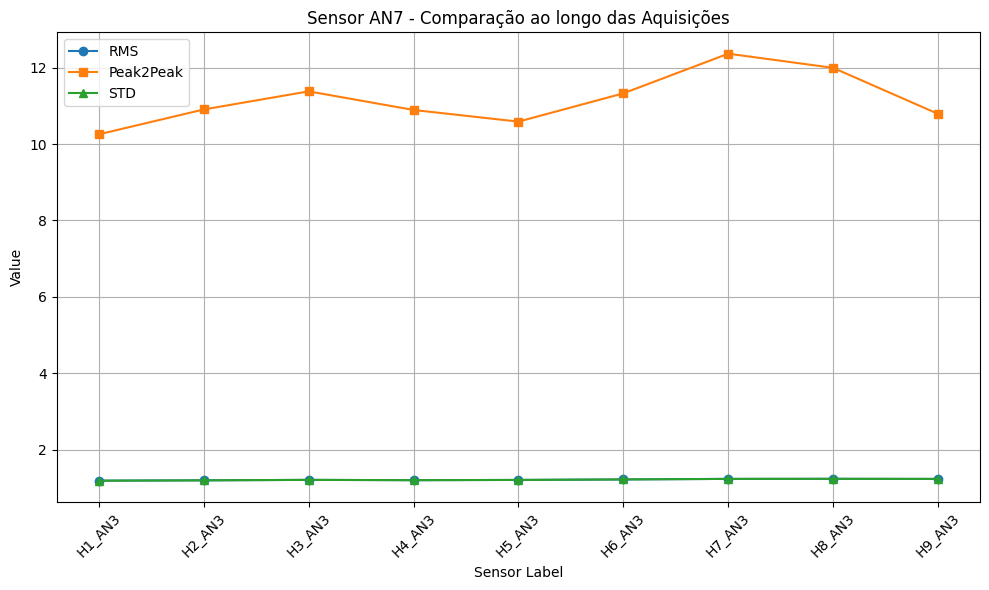

H1_AN3
RMS: 4.1500
Peak-to-Peak: 30.1730
Standard Deviation: 4.1492
H2_AN3
RMS: 4.1396
Peak-to-Peak: 30.6129
Standard Deviation: 4.1387
H3_AN3
RMS: 4.1420
Peak-to-Peak: 32.6279
Standard Deviation: 4.1411
H4_AN3
RMS: 4.1373
Peak-to-Peak: 32.7587
Standard Deviation: 4.1364
H5_AN3
RMS: 4.1327
Peak-to-Peak: 32.0634
Standard Deviation: 4.1317
H6_AN3
RMS: 4.1716
Peak-to-Peak: 33.3969
Standard Deviation: 4.1707
H7_AN3
RMS: 4.2297
Peak-to-Peak: 33.7953
Standard Deviation: 4.2288
H8_AN3
RMS: 4.2114
Peak-to-Peak: 33.6954
Standard Deviation: 4.2105
H9_AN3
RMS: 4.2140
Peak-to-Peak: 32.3512
Standard Deviation: 4.2131


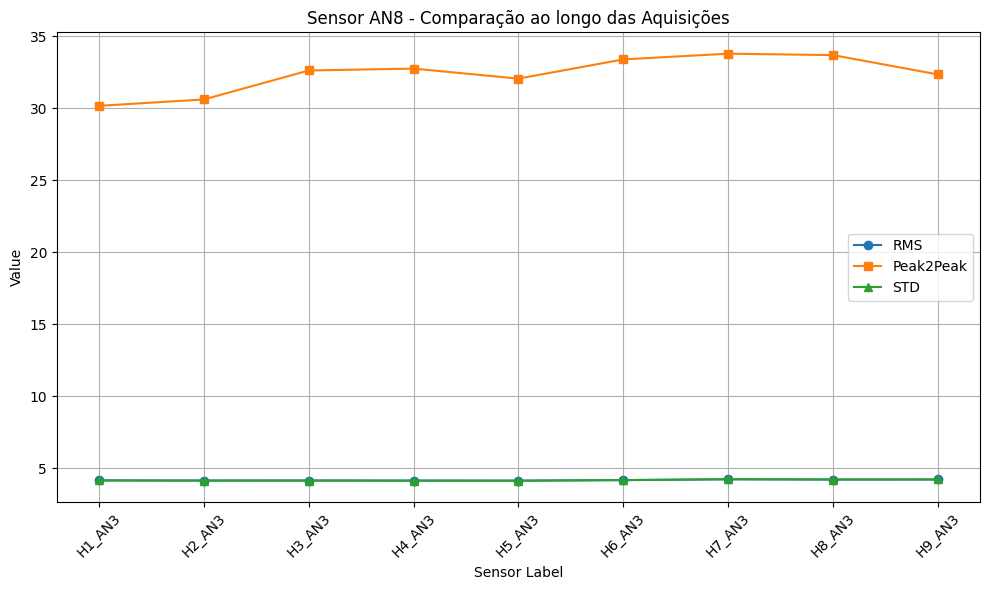

H1_AN3
RMS: 2.0799
Peak-to-Peak: 15.1747
Standard Deviation: 2.0451
H2_AN3
RMS: 2.0589
Peak-to-Peak: 14.8310
Standard Deviation: 2.0237
H3_AN3
RMS: 2.0400
Peak-to-Peak: 15.0493
Standard Deviation: 2.0044
H4_AN3
RMS: 2.0284
Peak-to-Peak: 15.5180
Standard Deviation: 1.9926
H5_AN3
RMS: 2.0004
Peak-to-Peak: 14.8428
Standard Deviation: 1.9641
H6_AN3
RMS: 1.9969
Peak-to-Peak: 15.5441
Standard Deviation: 1.9606
H7_AN3
RMS: 1.9928
Peak-to-Peak: 14.5558
Standard Deviation: 1.9564
H8_AN3
RMS: 1.9746
Peak-to-Peak: 14.8717
Standard Deviation: 1.9379
H9_AN3
RMS: 1.9537
Peak-to-Peak: 15.2440
Standard Deviation: 1.9166


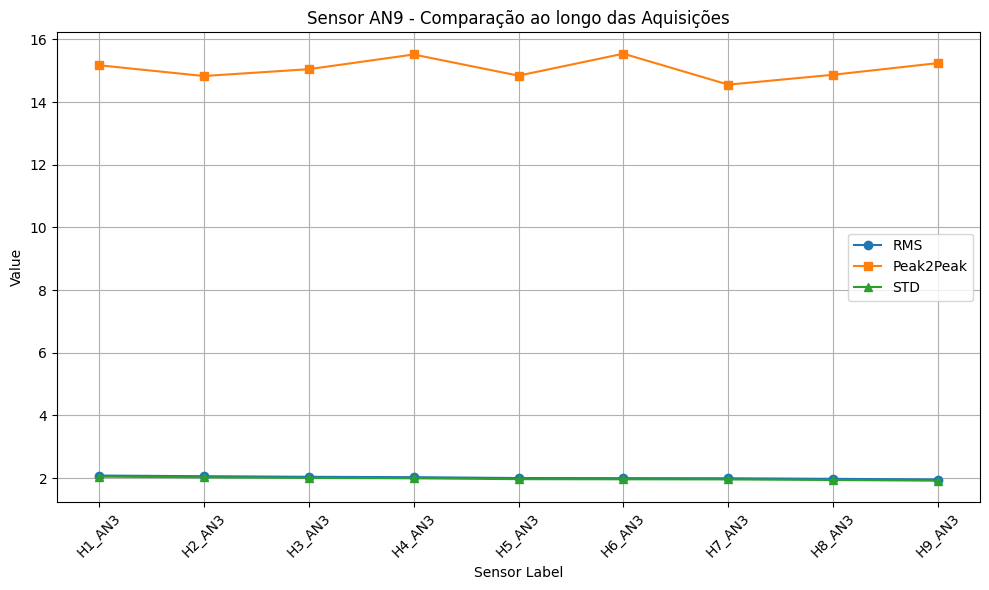

H1_AN3
RMS: 1.2311
Peak-to-Peak: 11.9399
Standard Deviation: 1.2311
H2_AN3
RMS: 1.2357
Peak-to-Peak: 11.5473
Standard Deviation: 1.2356
H3_AN3
RMS: 1.2424
Peak-to-Peak: 12.5717
Standard Deviation: 1.2424
H4_AN3
RMS: 1.2458
Peak-to-Peak: 11.2419
Standard Deviation: 1.2458
H5_AN3
RMS: 1.2491
Peak-to-Peak: 11.6132
Standard Deviation: 1.2491
H6_AN3
RMS: 1.2602
Peak-to-Peak: 11.6088
Standard Deviation: 1.2602
H7_AN3
RMS: 1.2652
Peak-to-Peak: 11.8684
Standard Deviation: 1.2652
H8_AN3
RMS: 1.2719
Peak-to-Peak: 11.7411
Standard Deviation: 1.2719
H9_AN3
RMS: 1.2796
Peak-to-Peak: 12.8726
Standard Deviation: 1.2796


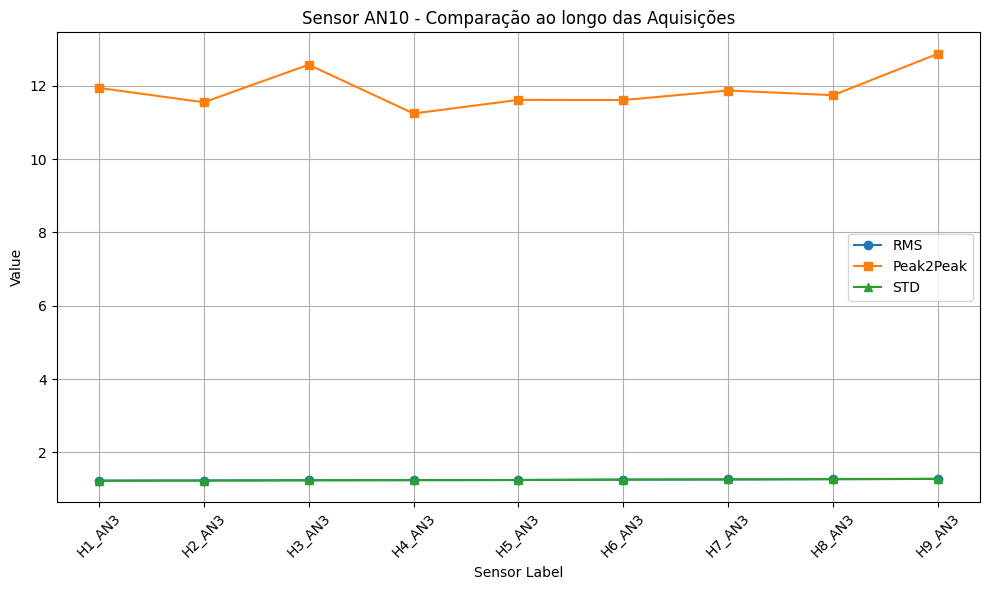

In [28]:
fs=40000

for sensor in range(8):
    features = []
    for i, vetor in enumerate(all_sensors_healthy_acquisitions[sensor]):
        label = f'H{i+1}_AN3'
        print(label)

        vetor_filtrado = lowpass_filter(vetor, fs=fs)
        rms, p2p, std= pre_process(vetor_filtrado)

        features.append({
            'Label': label,
            'RMS': rms,
            'Peak2Peak': p2p,
            'STD': std
        })

    df_healthy_acquisition_features = pd.DataFrame(features)

    plt.figure(figsize=(10, 6))
    plt.plot(df_healthy_acquisition_features['Label'], df_healthy_acquisition_features['RMS'], marker='o', label='RMS')
    plt.plot(df_healthy_acquisition_features['Label'], df_healthy_acquisition_features['Peak2Peak'], marker='s', label='Peak2Peak')
    plt.plot(df_healthy_acquisition_features['Label'], df_healthy_acquisition_features['STD'], marker='^', label='STD')

    plt.xlabel('Sensor Label')
    plt.ylabel('Value')
    plt.title(f'Sensor AN{sensor+3} - Comparação ao longo das Aquisições')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'Sensor_AN{sensor+3}_acquisicoes.png', dpi=600)
    plt.show()

In [ ]:
vector_1_AN3_aq1 = df_healthy_data['H1_AN3']
vector_2_AN3_aq1 = df_damaged_data['D1_AN3']
vector_3_AN3_aq1 = df_damaged_data['D2_AN3']
vector_4_AN3_aq1 = df_damaged_data['D3_AN3']
vector_5_AN3_aq1 = df_damaged_data['D4_AN3']
vector_6_AN3_aq1 = df_damaged_data['D5_AN3']
vector_7_AN3_aq1 = df_damaged_data['D6_AN3']
vector_8_AN3_aq1 = df_damaged_data['D7_AN3']

In [ ]:
all_sensors_acquisitions = []

for sensor in range(8):
    acquisitions = []
    for index in range(8):
        if index==0:
            vector = df_healthy_data[f'H1_AN{sensor+3}']
        else:
            vector = df_damaged_data[f'D{index}_AN{sensor+3}']
        acquisitions.append(vector)
    all_sensors_acquisitions.append(acquisitions)

In [38]:
len(all_sensors_acquisitions)

8

Healthy_AN3
RMS: 1.2311
Peak-to-Peak: 11.9399
Standard Deviation: 1.2311
Damage1_AN3
RMS: 1.2357
Peak-to-Peak: 11.5473
Standard Deviation: 1.2356
Damage2_AN3
RMS: 1.2424
Peak-to-Peak: 12.5717
Standard Deviation: 1.2424
Damage3_AN3
RMS: 1.2458
Peak-to-Peak: 11.2419
Standard Deviation: 1.2458
Damage4_AN3
RMS: 1.2491
Peak-to-Peak: 11.6132
Standard Deviation: 1.2491
Damage5_AN3
RMS: 1.2602
Peak-to-Peak: 11.6088
Standard Deviation: 1.2602
Damage6_AN3
RMS: 1.2652
Peak-to-Peak: 11.8684
Standard Deviation: 1.2652
Damage7_AN3
RMS: 1.2719
Peak-to-Peak: 11.7411
Standard Deviation: 1.2719
Damage8_AN3
RMS: 1.2796
Peak-to-Peak: 12.8726
Standard Deviation: 1.2796


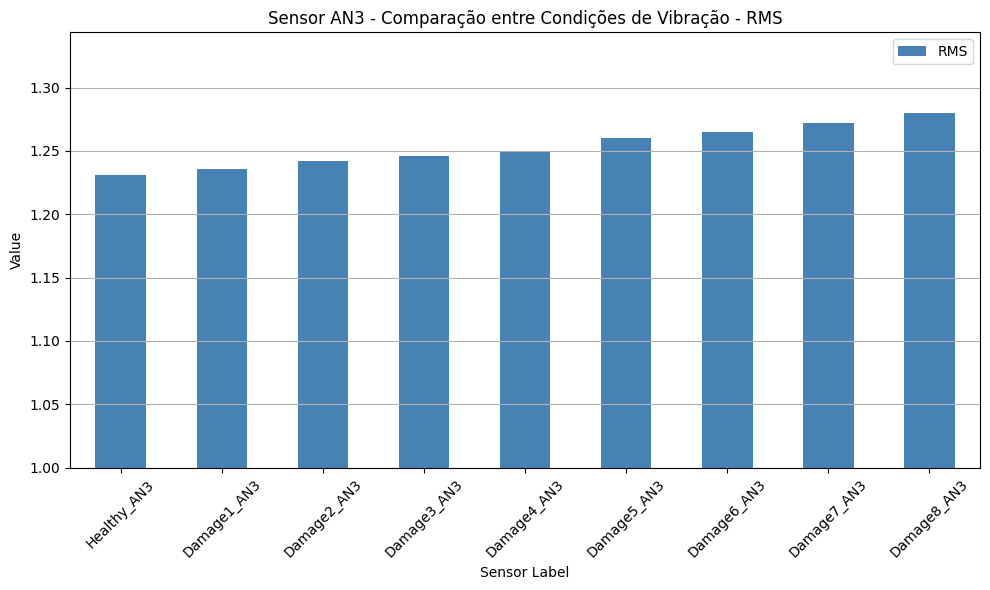

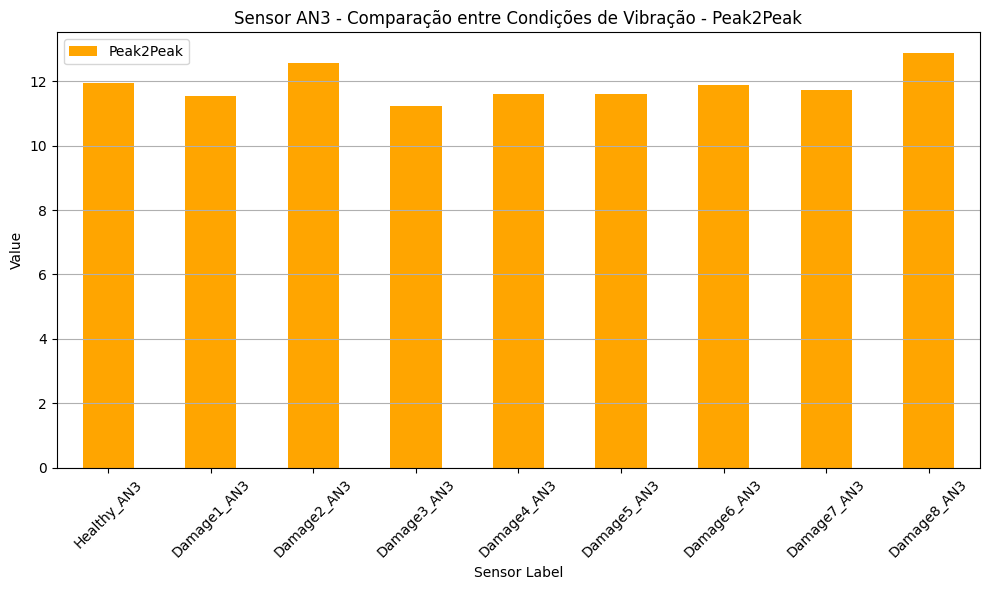

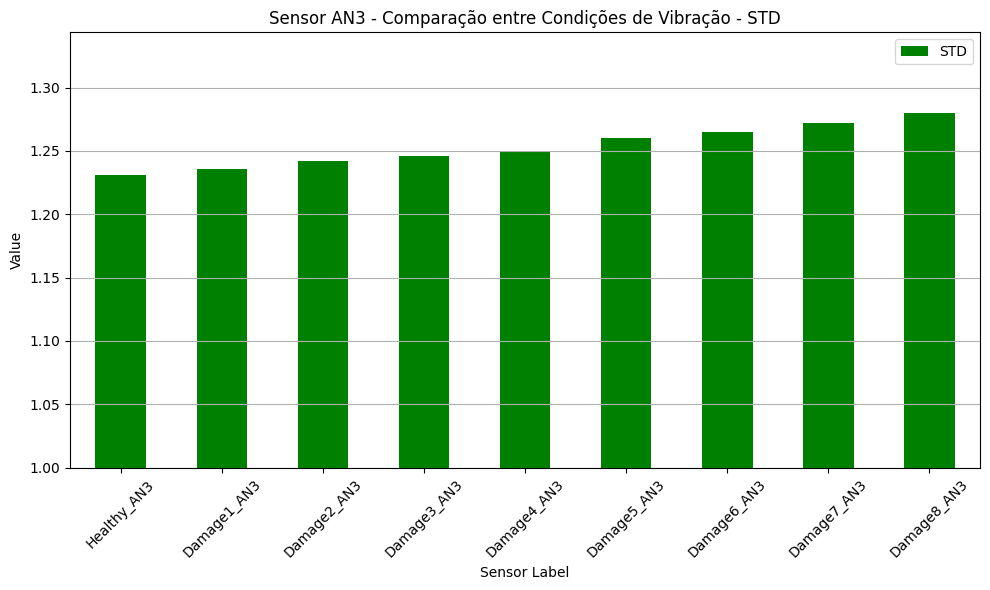

Healthy_AN4
RMS: 1.2311
Peak-to-Peak: 11.9399
Standard Deviation: 1.2311
Damage1_AN4
RMS: 1.2357
Peak-to-Peak: 11.5473
Standard Deviation: 1.2356
Damage2_AN4
RMS: 1.2424
Peak-to-Peak: 12.5717
Standard Deviation: 1.2424
Damage3_AN4
RMS: 1.2458
Peak-to-Peak: 11.2419
Standard Deviation: 1.2458
Damage4_AN4
RMS: 1.2491
Peak-to-Peak: 11.6132
Standard Deviation: 1.2491
Damage5_AN4
RMS: 1.2602
Peak-to-Peak: 11.6088
Standard Deviation: 1.2602
Damage6_AN4
RMS: 1.2652
Peak-to-Peak: 11.8684
Standard Deviation: 1.2652
Damage7_AN4
RMS: 1.2719
Peak-to-Peak: 11.7411
Standard Deviation: 1.2719
Damage8_AN4
RMS: 1.2796
Peak-to-Peak: 12.8726
Standard Deviation: 1.2796


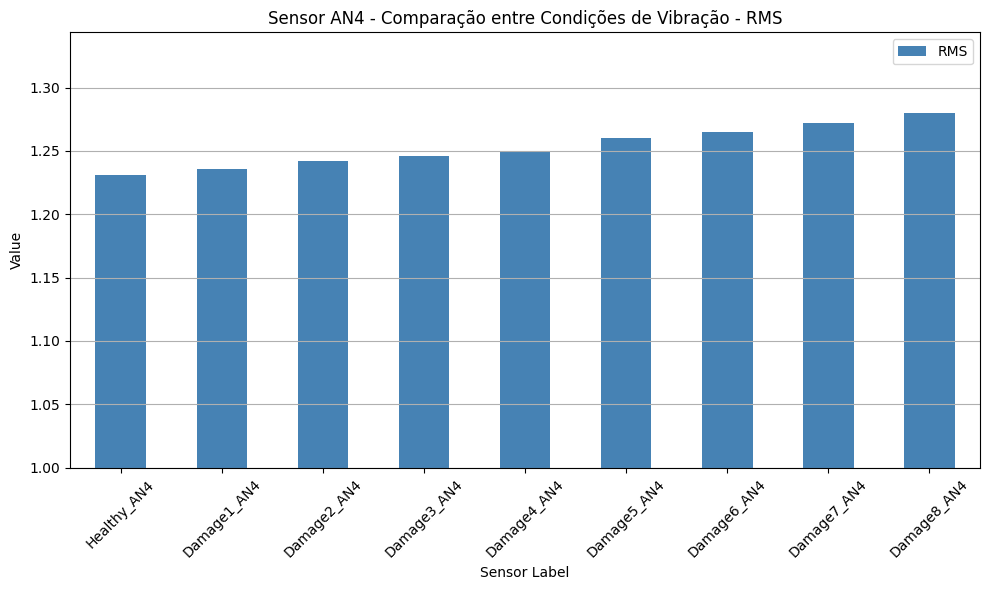

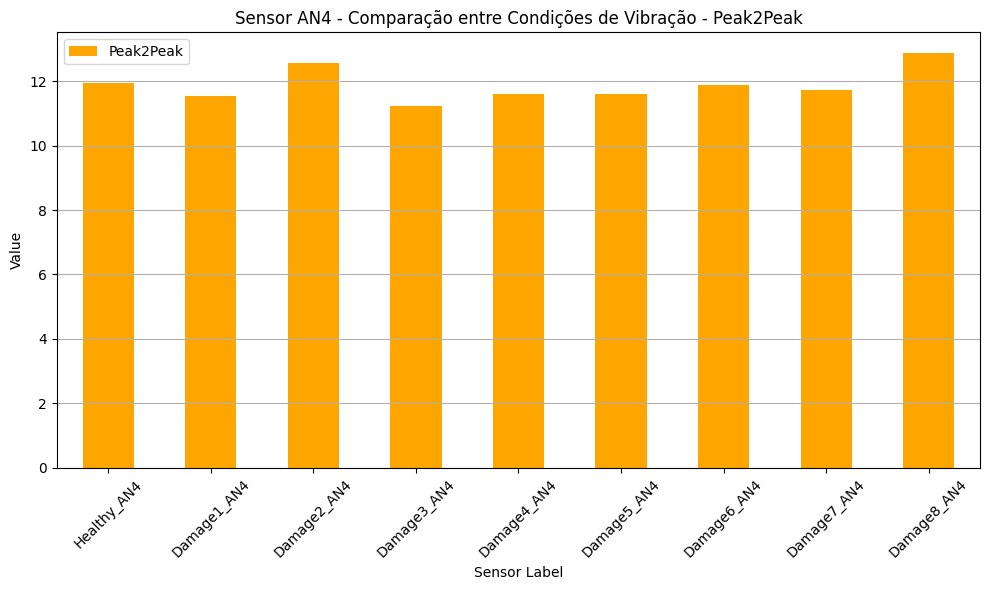

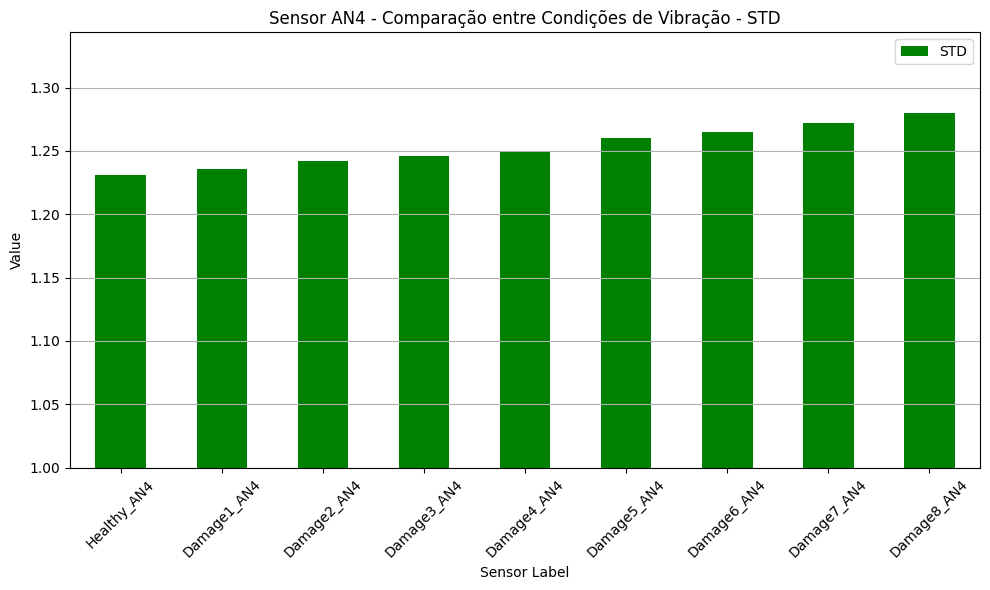

Healthy_AN5
RMS: 1.2311
Peak-to-Peak: 11.9399
Standard Deviation: 1.2311
Damage1_AN5
RMS: 1.2357
Peak-to-Peak: 11.5473
Standard Deviation: 1.2356
Damage2_AN5
RMS: 1.2424
Peak-to-Peak: 12.5717
Standard Deviation: 1.2424
Damage3_AN5
RMS: 1.2458
Peak-to-Peak: 11.2419
Standard Deviation: 1.2458
Damage4_AN5
RMS: 1.2491
Peak-to-Peak: 11.6132
Standard Deviation: 1.2491
Damage5_AN5
RMS: 1.2602
Peak-to-Peak: 11.6088
Standard Deviation: 1.2602
Damage6_AN5
RMS: 1.2652
Peak-to-Peak: 11.8684
Standard Deviation: 1.2652
Damage7_AN5
RMS: 1.2719
Peak-to-Peak: 11.7411
Standard Deviation: 1.2719
Damage8_AN5
RMS: 1.2796
Peak-to-Peak: 12.8726
Standard Deviation: 1.2796


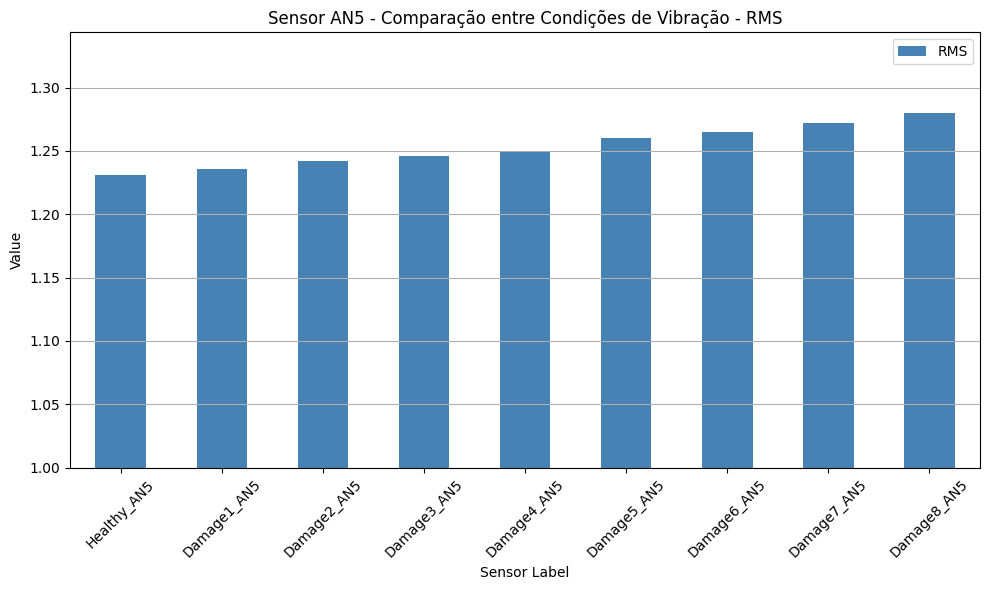

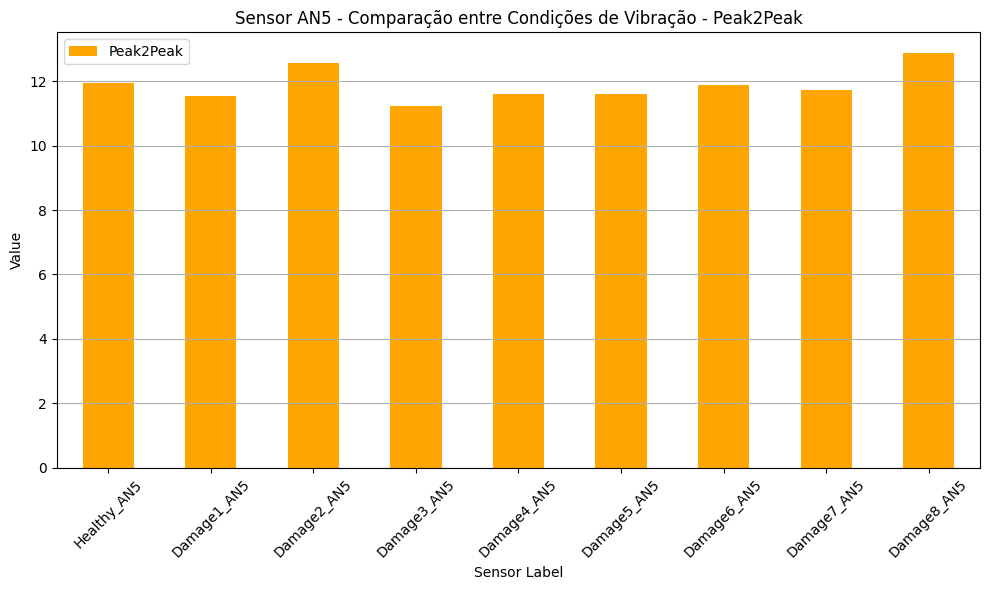

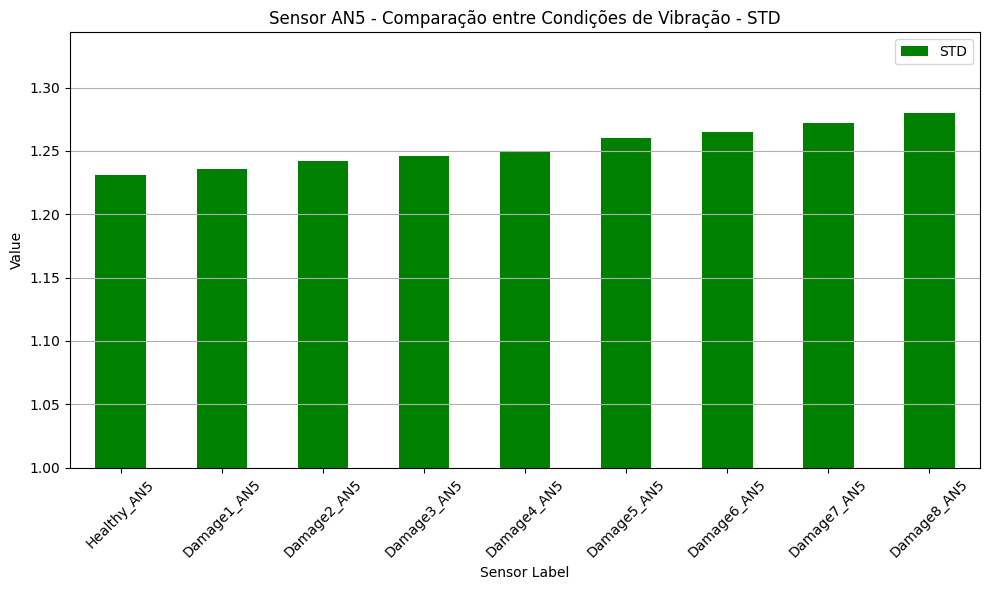

Healthy_AN6
RMS: 1.2311
Peak-to-Peak: 11.9399
Standard Deviation: 1.2311
Damage1_AN6
RMS: 1.2357
Peak-to-Peak: 11.5473
Standard Deviation: 1.2356
Damage2_AN6
RMS: 1.2424
Peak-to-Peak: 12.5717
Standard Deviation: 1.2424
Damage3_AN6
RMS: 1.2458
Peak-to-Peak: 11.2419
Standard Deviation: 1.2458
Damage4_AN6
RMS: 1.2491
Peak-to-Peak: 11.6132
Standard Deviation: 1.2491
Damage5_AN6
RMS: 1.2602
Peak-to-Peak: 11.6088
Standard Deviation: 1.2602
Damage6_AN6
RMS: 1.2652
Peak-to-Peak: 11.8684
Standard Deviation: 1.2652
Damage7_AN6
RMS: 1.2719
Peak-to-Peak: 11.7411
Standard Deviation: 1.2719
Damage8_AN6
RMS: 1.2796
Peak-to-Peak: 12.8726
Standard Deviation: 1.2796


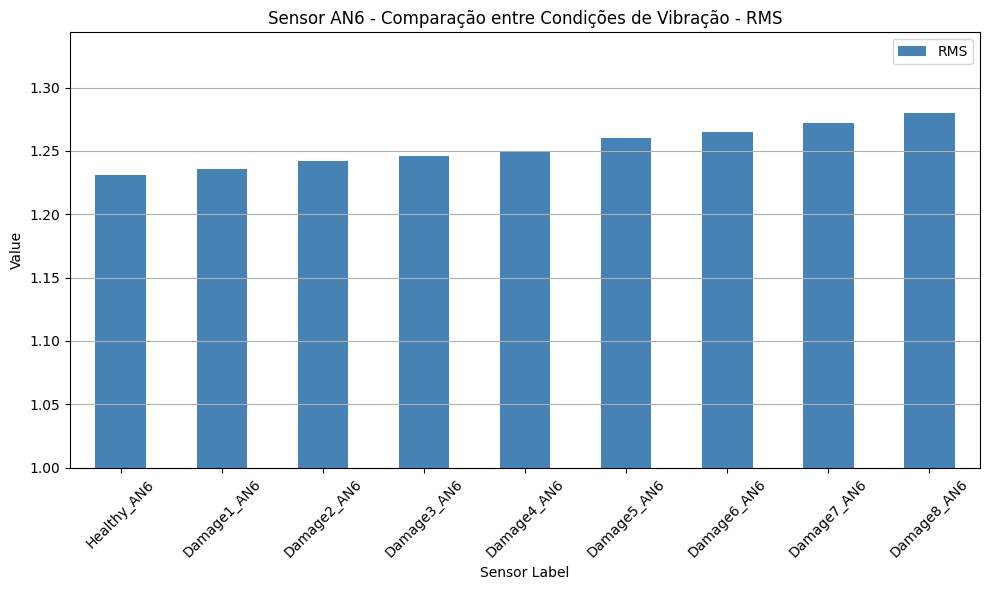

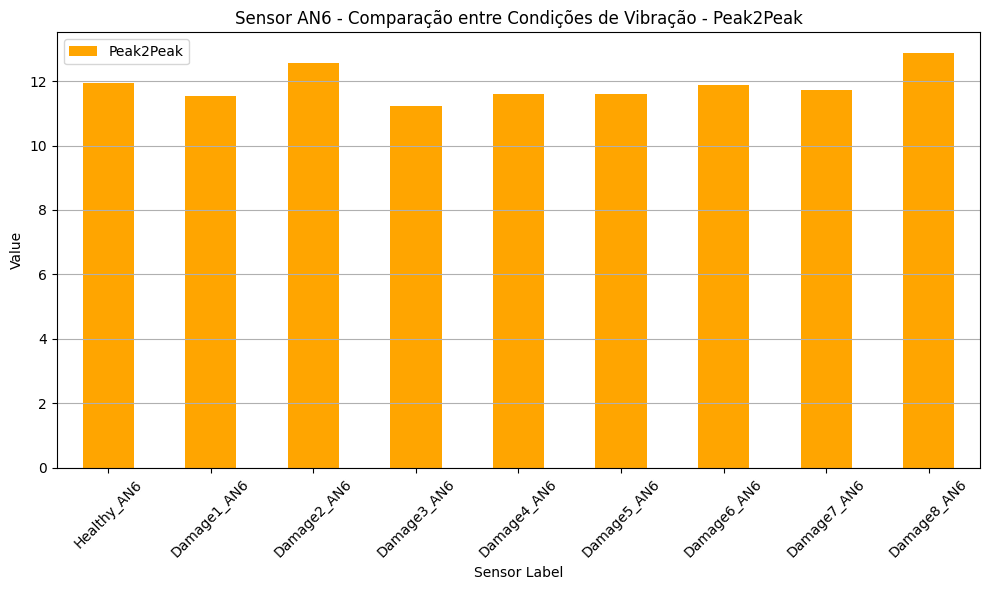

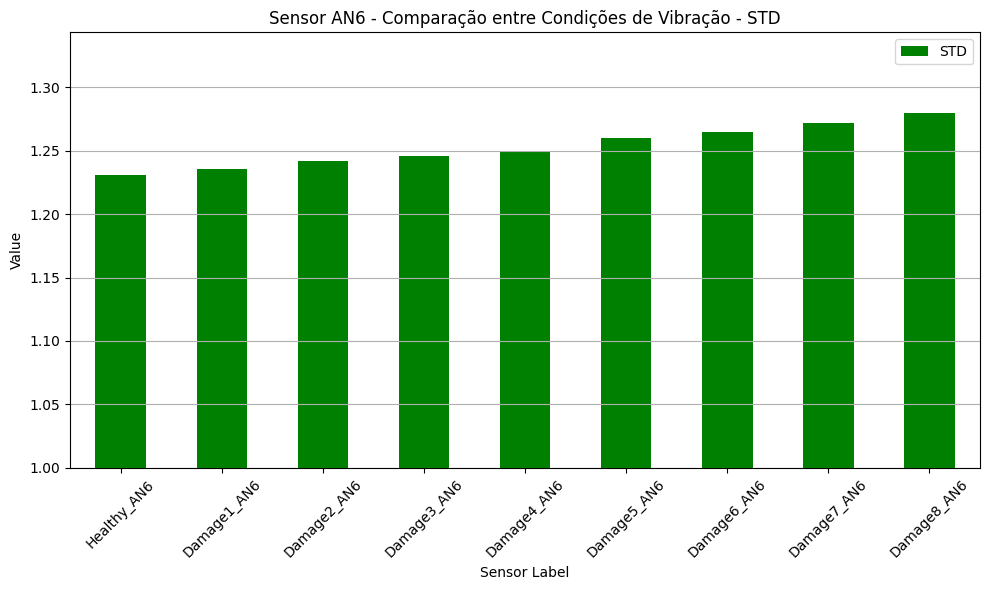

Healthy_AN7
RMS: 1.2311
Peak-to-Peak: 11.9399
Standard Deviation: 1.2311
Damage1_AN7
RMS: 1.2357
Peak-to-Peak: 11.5473
Standard Deviation: 1.2356
Damage2_AN7
RMS: 1.2424
Peak-to-Peak: 12.5717
Standard Deviation: 1.2424
Damage3_AN7
RMS: 1.2458
Peak-to-Peak: 11.2419
Standard Deviation: 1.2458
Damage4_AN7
RMS: 1.2491
Peak-to-Peak: 11.6132
Standard Deviation: 1.2491
Damage5_AN7
RMS: 1.2602
Peak-to-Peak: 11.6088
Standard Deviation: 1.2602
Damage6_AN7
RMS: 1.2652
Peak-to-Peak: 11.8684
Standard Deviation: 1.2652
Damage7_AN7
RMS: 1.2719
Peak-to-Peak: 11.7411
Standard Deviation: 1.2719
Damage8_AN7
RMS: 1.2796
Peak-to-Peak: 12.8726
Standard Deviation: 1.2796


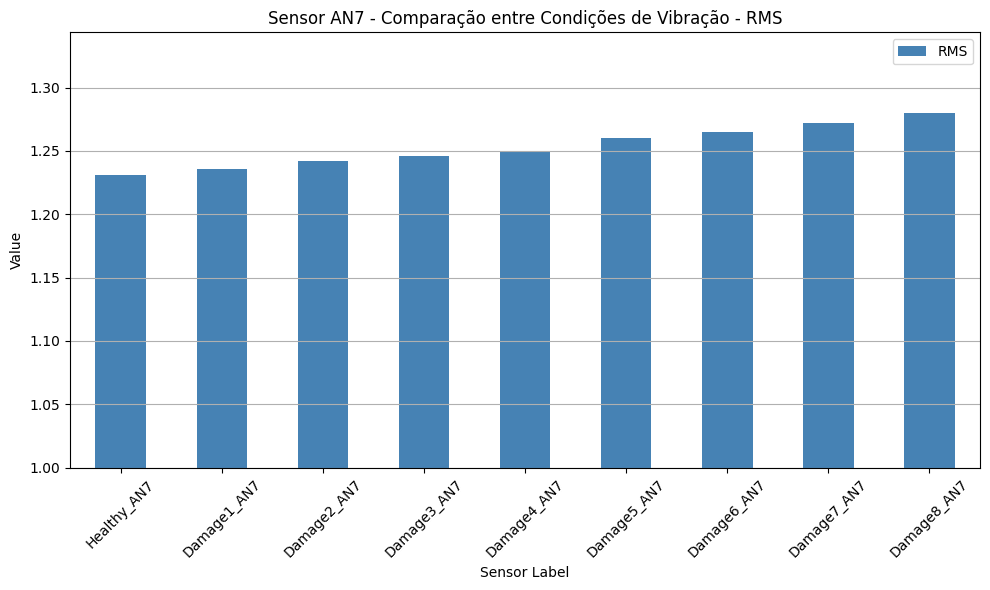

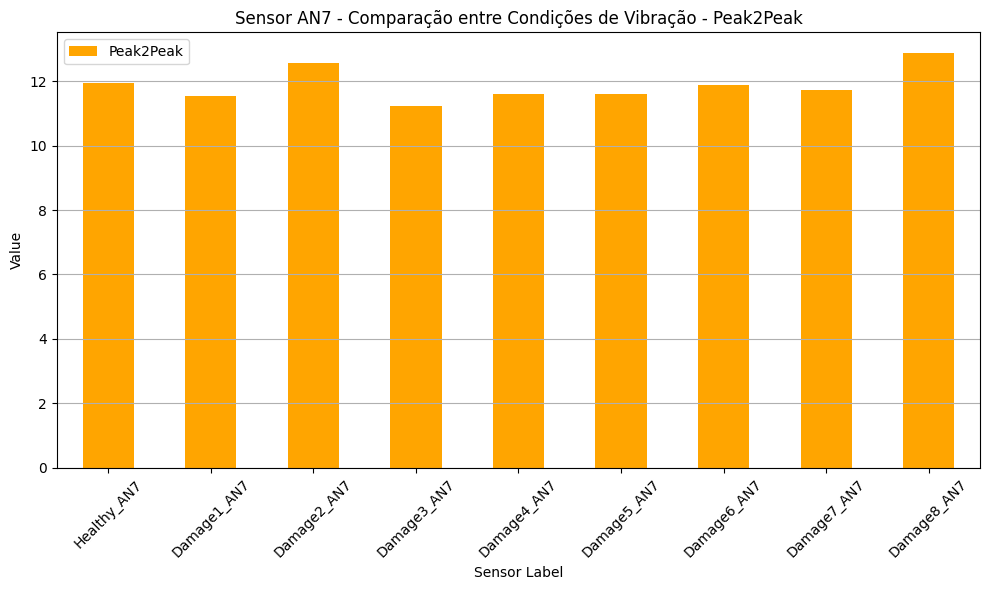

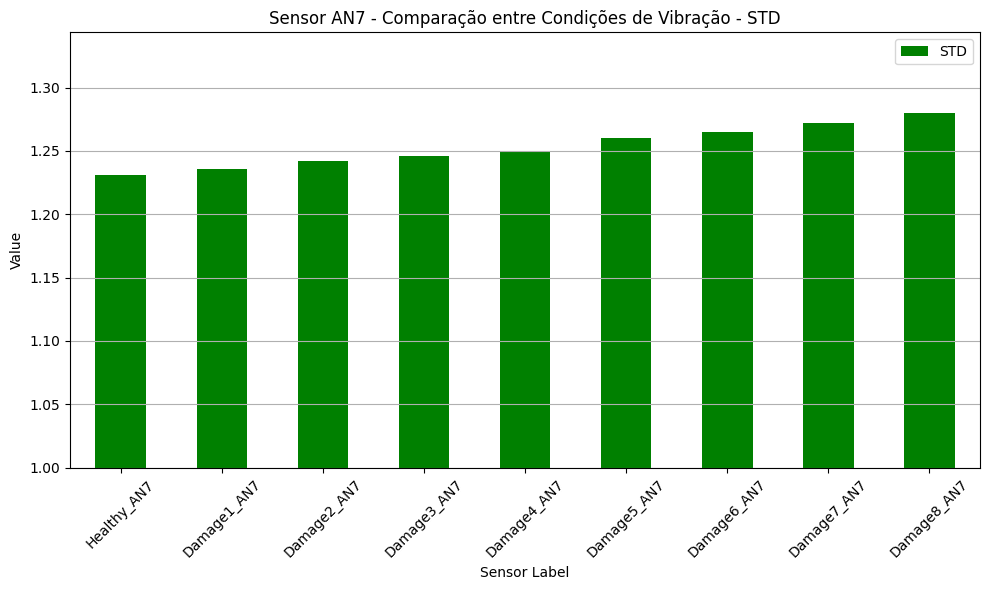

Healthy_AN8
RMS: 1.2311
Peak-to-Peak: 11.9399
Standard Deviation: 1.2311
Damage1_AN8
RMS: 1.2357
Peak-to-Peak: 11.5473
Standard Deviation: 1.2356
Damage2_AN8
RMS: 1.2424
Peak-to-Peak: 12.5717
Standard Deviation: 1.2424
Damage3_AN8
RMS: 1.2458
Peak-to-Peak: 11.2419
Standard Deviation: 1.2458
Damage4_AN8
RMS: 1.2491
Peak-to-Peak: 11.6132
Standard Deviation: 1.2491
Damage5_AN8
RMS: 1.2602
Peak-to-Peak: 11.6088
Standard Deviation: 1.2602
Damage6_AN8
RMS: 1.2652
Peak-to-Peak: 11.8684
Standard Deviation: 1.2652
Damage7_AN8
RMS: 1.2719
Peak-to-Peak: 11.7411
Standard Deviation: 1.2719
Damage8_AN8
RMS: 1.2796
Peak-to-Peak: 12.8726
Standard Deviation: 1.2796


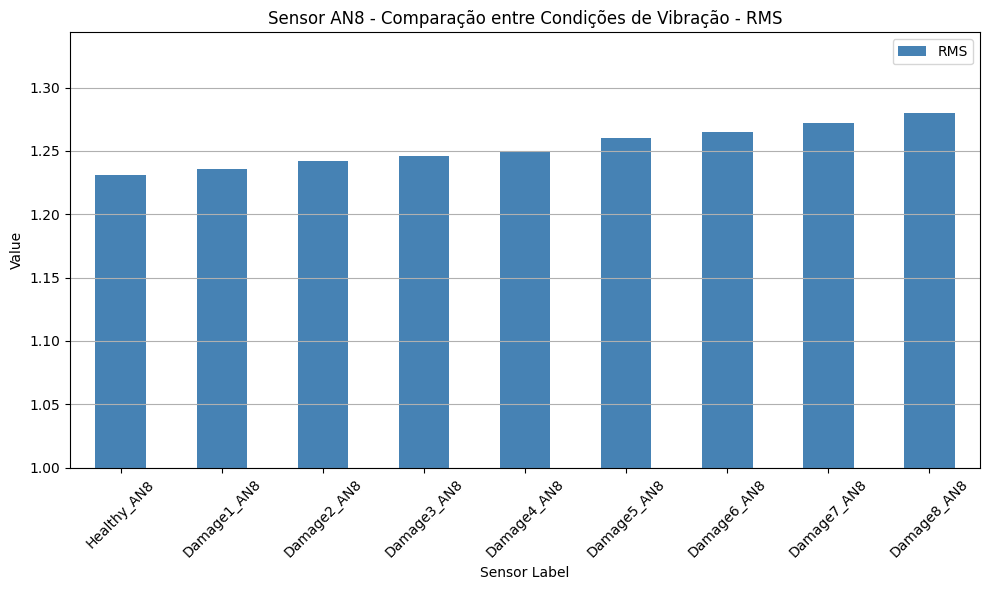

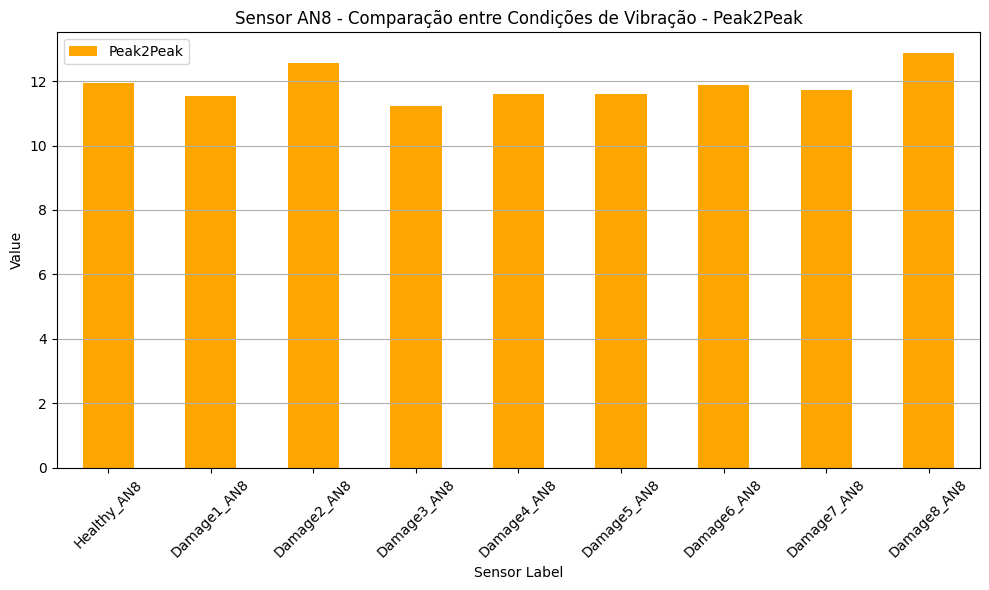

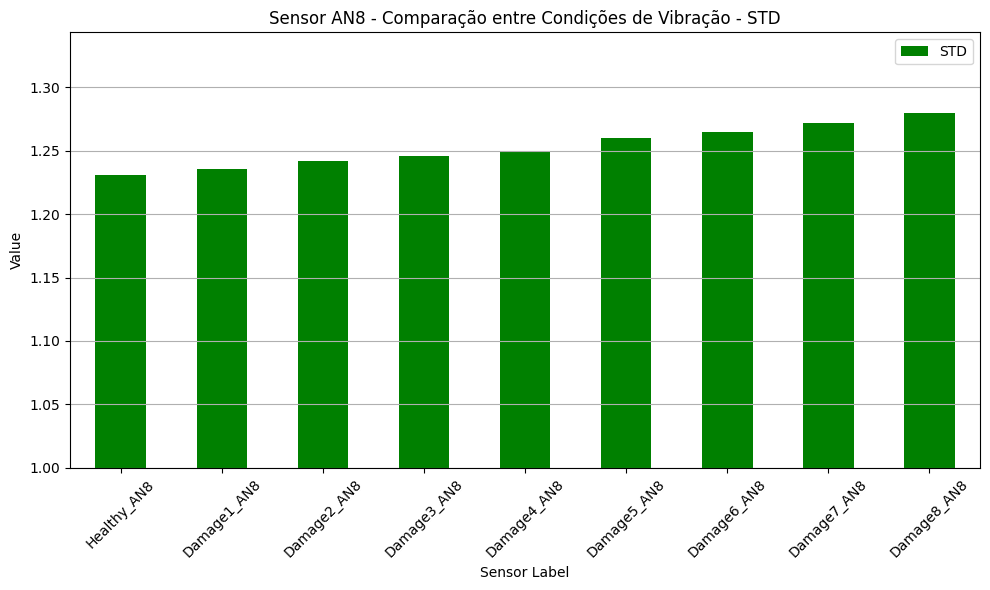

Healthy_AN9
RMS: 1.2311
Peak-to-Peak: 11.9399
Standard Deviation: 1.2311
Damage1_AN9
RMS: 1.2357
Peak-to-Peak: 11.5473
Standard Deviation: 1.2356
Damage2_AN9
RMS: 1.2424
Peak-to-Peak: 12.5717
Standard Deviation: 1.2424
Damage3_AN9
RMS: 1.2458
Peak-to-Peak: 11.2419
Standard Deviation: 1.2458
Damage4_AN9
RMS: 1.2491
Peak-to-Peak: 11.6132
Standard Deviation: 1.2491
Damage5_AN9
RMS: 1.2602
Peak-to-Peak: 11.6088
Standard Deviation: 1.2602
Damage6_AN9
RMS: 1.2652
Peak-to-Peak: 11.8684
Standard Deviation: 1.2652
Damage7_AN9
RMS: 1.2719
Peak-to-Peak: 11.7411
Standard Deviation: 1.2719
Damage8_AN9
RMS: 1.2796
Peak-to-Peak: 12.8726
Standard Deviation: 1.2796


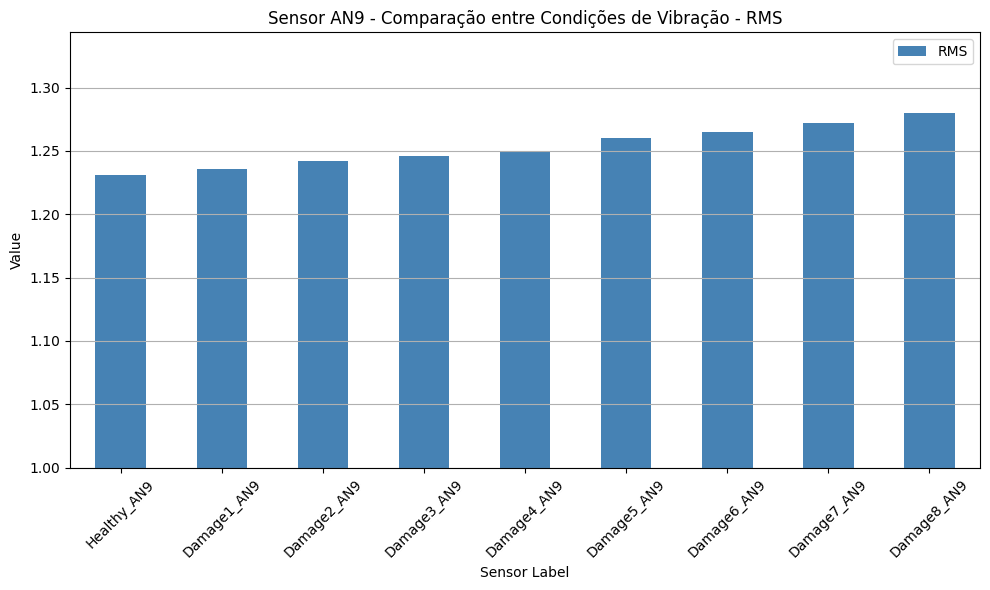

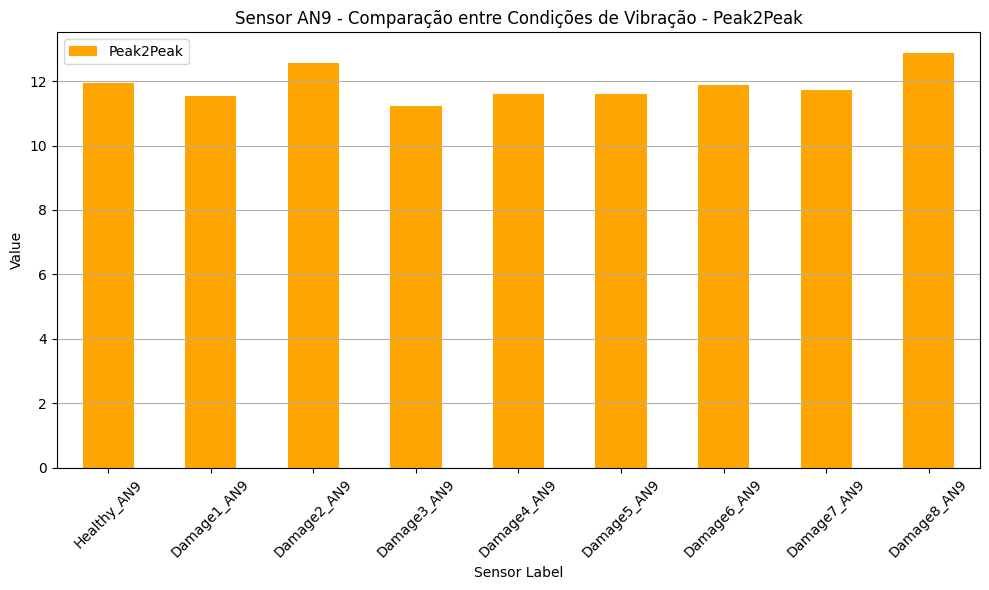

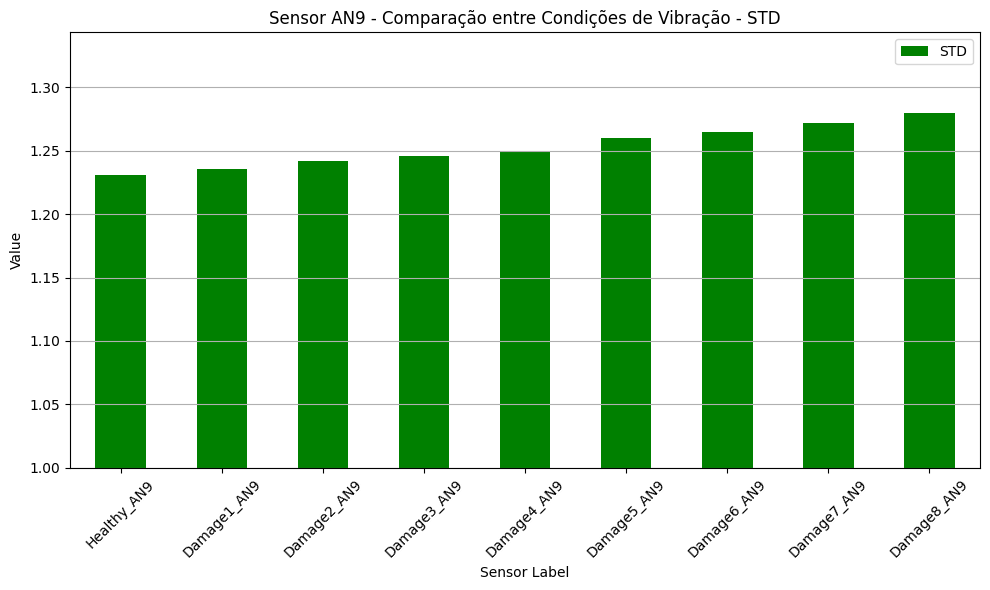

Healthy_AN10
RMS: 1.2311
Peak-to-Peak: 11.9399
Standard Deviation: 1.2311
Damage1_AN10
RMS: 1.2357
Peak-to-Peak: 11.5473
Standard Deviation: 1.2356
Damage2_AN10
RMS: 1.2424
Peak-to-Peak: 12.5717
Standard Deviation: 1.2424
Damage3_AN10
RMS: 1.2458
Peak-to-Peak: 11.2419
Standard Deviation: 1.2458
Damage4_AN10
RMS: 1.2491
Peak-to-Peak: 11.6132
Standard Deviation: 1.2491
Damage5_AN10
RMS: 1.2602
Peak-to-Peak: 11.6088
Standard Deviation: 1.2602
Damage6_AN10
RMS: 1.2652
Peak-to-Peak: 11.8684
Standard Deviation: 1.2652
Damage7_AN10
RMS: 1.2719
Peak-to-Peak: 11.7411
Standard Deviation: 1.2719
Damage8_AN10
RMS: 1.2796
Peak-to-Peak: 12.8726
Standard Deviation: 1.2796


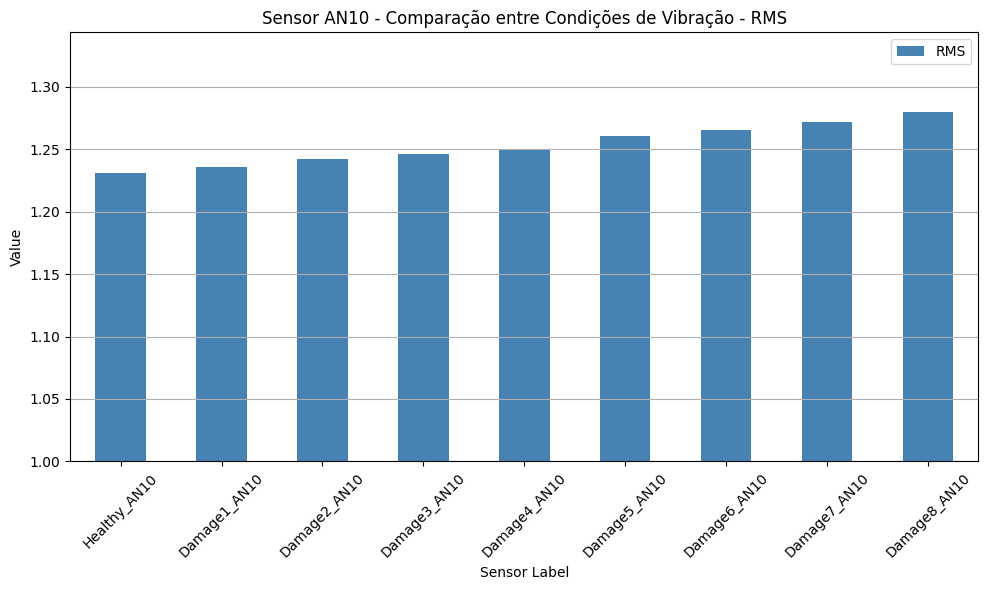

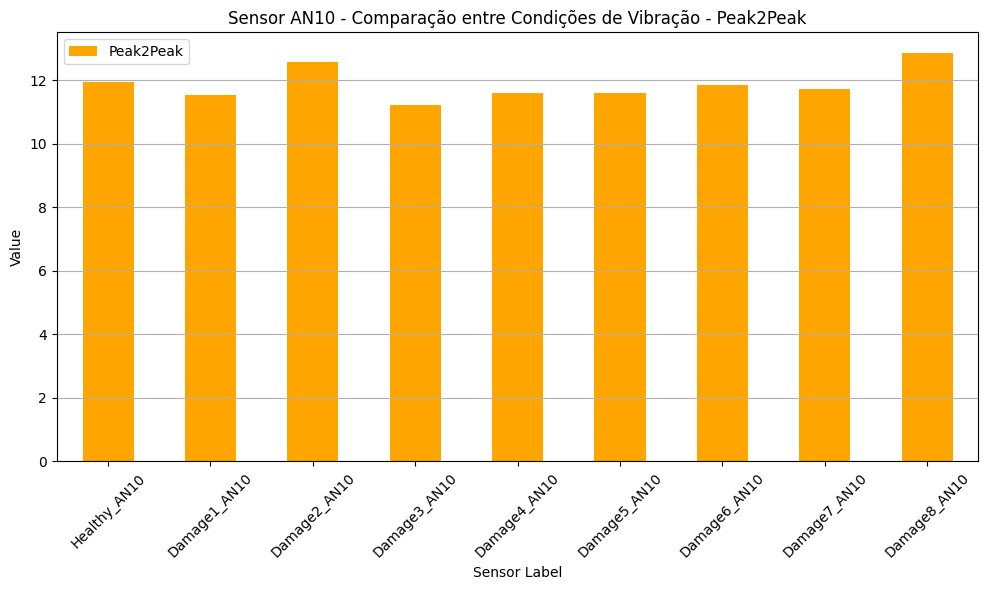

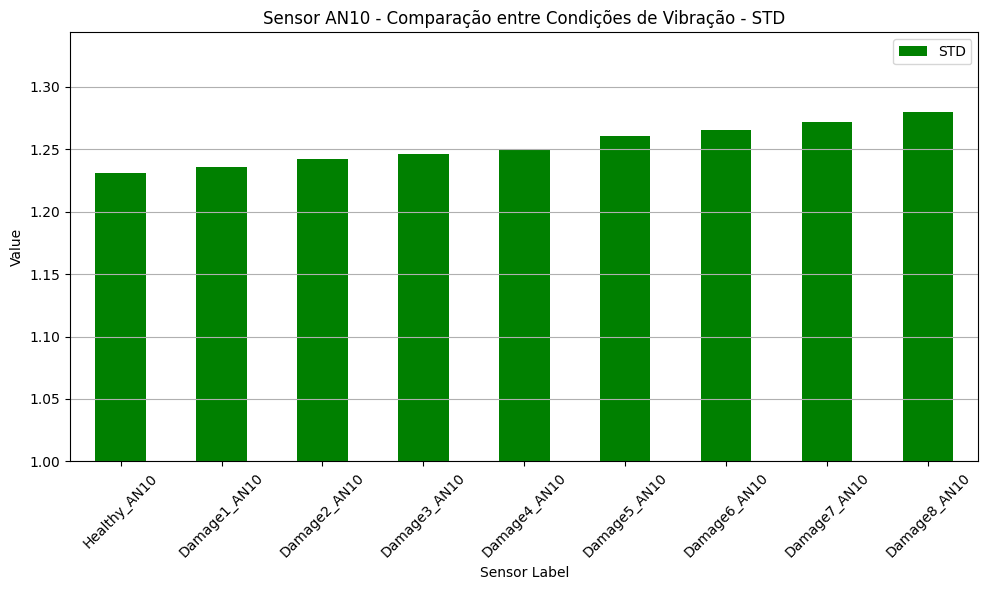

In [47]:
fs=40000

for sensor in range(8):
    features = []
    for i, vetor in enumerate(all_sensors_acquisitions[sensor]):
        label = f"Healthy_AN{sensor+3}" if i == 0 else f"Damage{i}_AN{sensor+3}"
        print(label)

        vetor_filtrado = lowpass_filter(vetor, fs=fs)
        rms, p2p, std= pre_process(vetor_filtrado)

        features.append({
            'Label': label,
            'RMS': rms,
            'Peak2Peak': p2p,
            'STD': std
        })

    df_acquisition_features = pd.DataFrame(features)


    df_acquisition_features.set_index('Label')[['RMS']].plot(kind='bar', figsize=(10, 6),color='steelblue')
    plt.title(f'Sensor AN{sensor+3} - Comparação entre Condições de Vibração - RMS')
    plt.xlabel('Sensor Label')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.ylim(bottom=1)
    plt.tight_layout()
    plt.savefig(f'Sensor_AN{sensor+3}-ComporacaoCondicoesVibracao-RMS.png', dpi=600)
    plt.show()

    df_acquisition_features.set_index('Label')[['Peak2Peak']].plot(kind='bar', figsize=(10, 6),color='orange')
    plt.title(f'Sensor AN{sensor+3} - Comparação entre Condições de Vibração - Peak2Peak')
    plt.xlabel('Sensor Label')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig(f'Sensor_AN{sensor+3}-ComporacaoCondicoesVibracao-p2p.png', dpi=600)
    plt.show()
    
    df_acquisition_features.set_index('Label')[['STD']].plot(kind='bar', figsize=(10, 6), color='green')
    plt.title(f'Sensor AN{sensor+3} - Comparação entre Condições de Vibração - STD')
    plt.xlabel('Sensor Label')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.ylim(bottom=1)
    plt.tight_layout()
    plt.savefig(f'Sensor_AN{sensor+3}-ComporacaoCondicoesVibracao-std.png', dpi=600)
    plt.show()